<a href="https://colab.research.google.com/github/soumyaranjan23/Linear-Regression-Car-Dekho-/blob/main/Copy_of_Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# **Importing the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cars = pd.read_csv ('/content/drive/MyDrive/car data.csv')

This is Vehicle dataset from cardekho Dataset . This dataset contains information about used cars listed on website cardekho.com. We are going to use for finding predictions of price with the use of regression models.

The datasets consist of several independent variables include:

**Car_Name** : This column should be filled with the name of the car.

**Year** : This column should be filled with the year in which the car was bought.

**Selling_Price** : This column should be filled with the price the owner wants to sell the car at.

**Present_Price** : This is the current ex-showroom price of the car.

**Kms_Driven** : This is the distance completed by the car in km.

**Fuel_Type** : Fuel type of the car i.e Diesel,Petrol,CNG

**Seller_Type** : Defines whether the seller is a dealer or an individual.

**Transmission** : Defines whether the car is manual or automatic.

**Owner** : Defines the number of owners the car has previously had.

In [4]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
cars.shape

(301, 9)

In [6]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


There are all non null values present in the columns

In this regression model the dependent variable will be 'Selling_price' rest all the variables will be considered as independent variables

For buliding linear regression model we need all numerical variables,so the features containing object datatype are either converted or dropped

In [8]:
# Car_name
cars.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

Car_Name contains 98 different values so it is better to drop this column

In [9]:
cars.drop(['Car_Name'],axis=1, inplace = True)

In [10]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **EDA**

# **UNIVARIATE ANALYSIS**

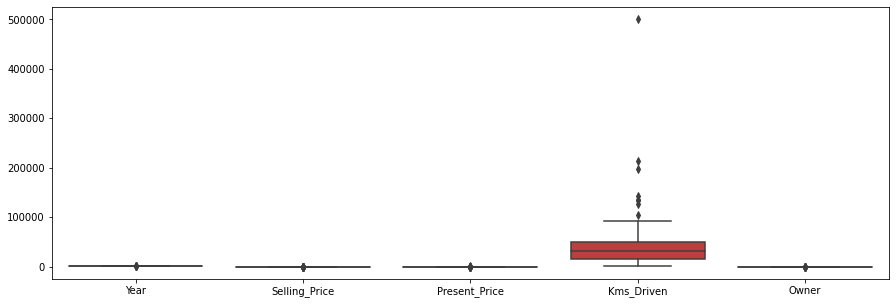

In [11]:
#Year

plt.figure(figsize= (15,5))
sns.boxplot(data=cars)
plt.show()

In [12]:
# from the boxplot we can see that kms_driven has outliers

In [13]:
q1 = cars['Kms_Driven'].quantile(0.25)
q3 = cars['Kms_Driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

33767.0 99417.5 -35650.5


In [14]:
cars[cars['Kms_Driven']>UL]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [15]:
cars[cars['Kms_Driven']>UL].count()['Kms_Driven']

8

These 8 values are greater than the upper limit value 99417.5

We would remove these values

In [16]:
# outliers removal from Kms_Driven

df = cars[cars['Kms_Driven']<UL]
cars=df
cars

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


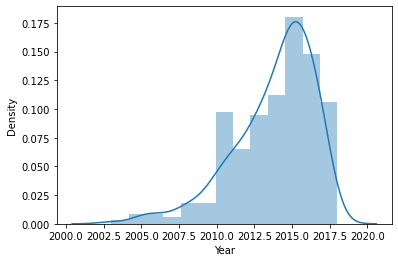

In [17]:
sns.distplot(df['Year'])

In [18]:
# The Years variable is left skewed 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


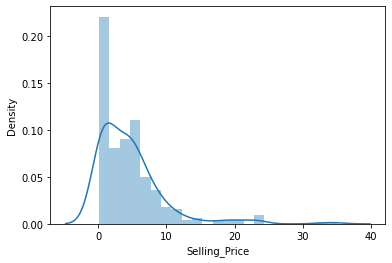

In [19]:
sns.distplot(df['Selling_Price'])
plt.show()

In [20]:
# the selling price is right skewed

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


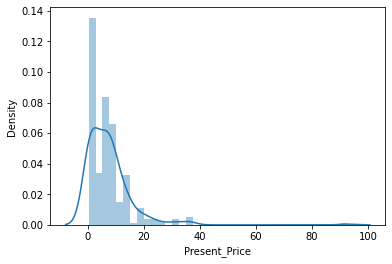

In [21]:
sns.distplot(df['Present_Price'])
plt.show()

In [22]:
# the present_price is right skewed 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


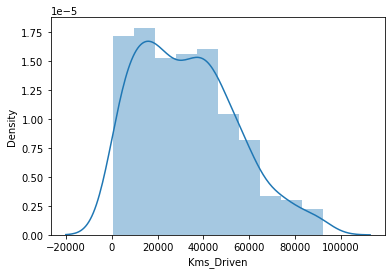

In [23]:
sns.distplot(df['Kms_Driven'])
plt.show()

In [24]:
# The Kms_Driven are almost normally distributed after removing the outliers, the max values lie between 20000 to 50000
#kms

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


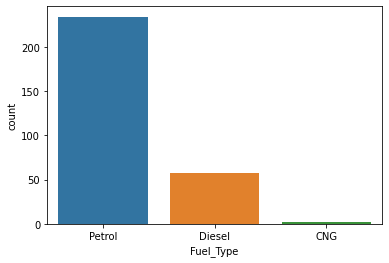

In [25]:
sns.countplot(cars['Fuel_Type'])
plt.show()

In [26]:
# From this bar plot we can see that there arer three categories of Fuel_Type 
#Petrol Fuel_tupe is the maximum in number and CNG cars are the least 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


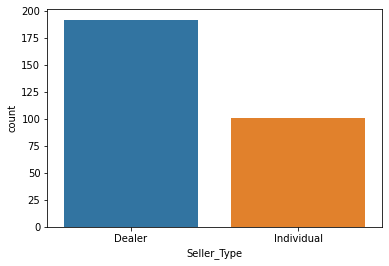

In [27]:
sns.countplot(cars['Seller_Type'])
plt.show()

In [28]:
# There are two types of sellers : Individual and Dealer 
# The Seller_type dealer is greater than the individual seller_type

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


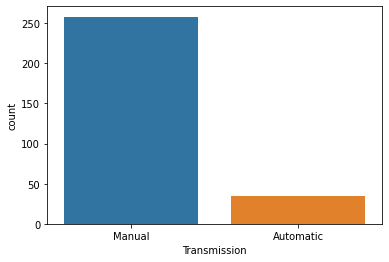

In [29]:
sns.countplot(cars['Transmission'])
plt.show()

In [30]:
# The Transmission feature has 2 categories
# Manual and Automatic

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

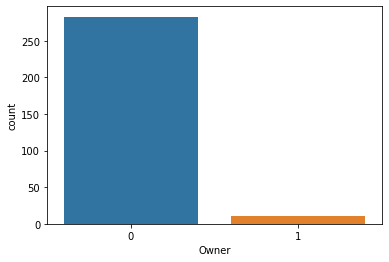

In [31]:
sns.countplot(cars['Owner'])
plt.show





In [32]:
# The having 0 previous owners is more than the cars having one previous owner

# **Bivariate analysis**

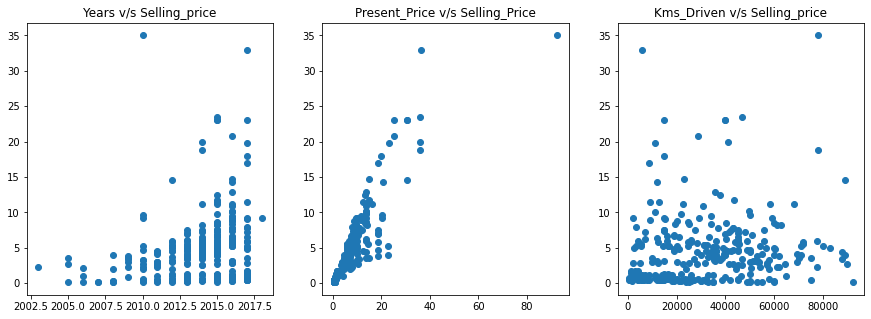

In [33]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

#scatter plot 1 
ax1.scatter(x=cars['Year'],y= cars['Selling_Price'])
ax1.set_title('Years v/s Selling_price')

#scatter plot 2
ax2.scatter(x=cars['Present_Price'], y=cars['Selling_Price'])
ax2.set_title('Present_Price v/s Selling_Price')

#scatter plot 3
ax3.scatter(x=cars['Kms_Driven'],y=cars['Selling_Price'])
ax3.set_title('Kms_Driven v/s Selling_price')

plt.draw()

1. The older the car the lesser the selling price.
2. The selling price of those cars is greater whose current ex-showroom price(present_price) is greater i.e the present_price and selling_price is directly propotional.
3. As the Km_Driven increases the selling_price of the car decreases.

Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

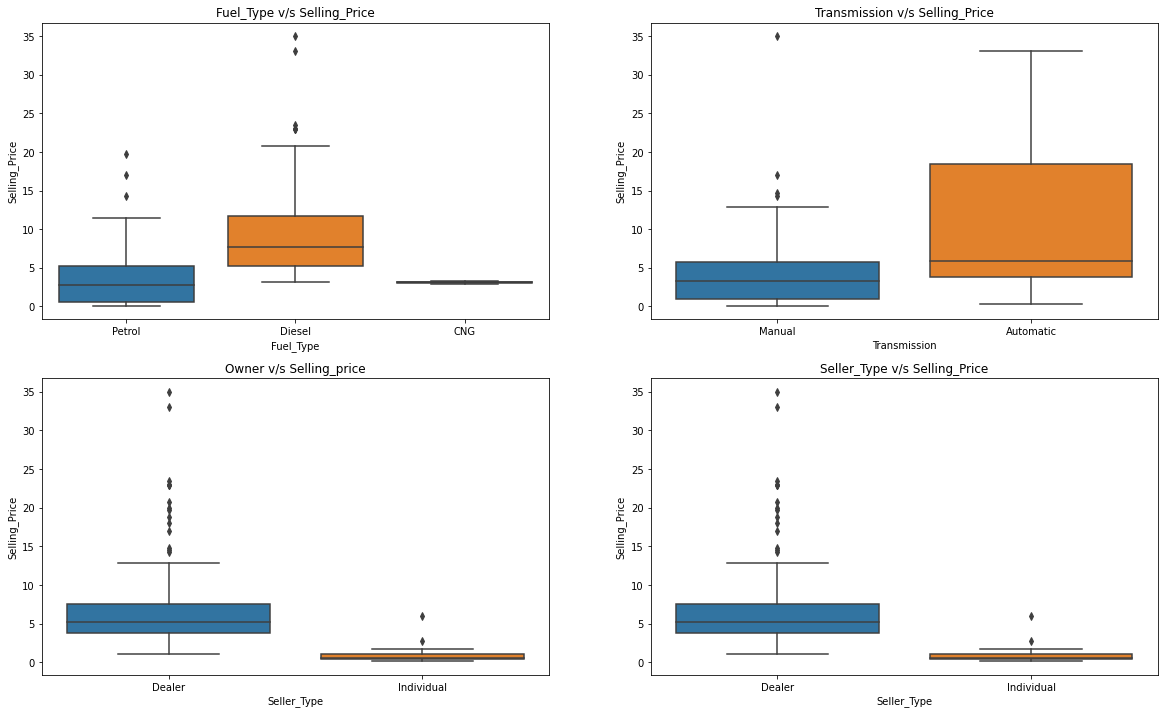

In [34]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

sns.boxplot(x=cars.Fuel_Type,y=cars.Selling_Price,ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling_Price')

sns.boxplot(x=cars.Transmission,y=cars.Selling_Price,ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

sns.boxplot(x=cars.Seller_Type,y=cars.Selling_Price,ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_price')

sns.boxplot(x=cars.Seller_Type,y=cars.Selling_Price,ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')

1. The Diesel cars having the highest selling_price with most number of outliers being present. Diesel > CNG > Petrol in terms of selling price.
2. Automatic cars are expensive than manual cars.
3. The cars with no previous owner are expensive than with a previous owner.
4. Individuals are selling their carsat lesser price than cars being sold by the dealers.

# **Multivariate Analysis**

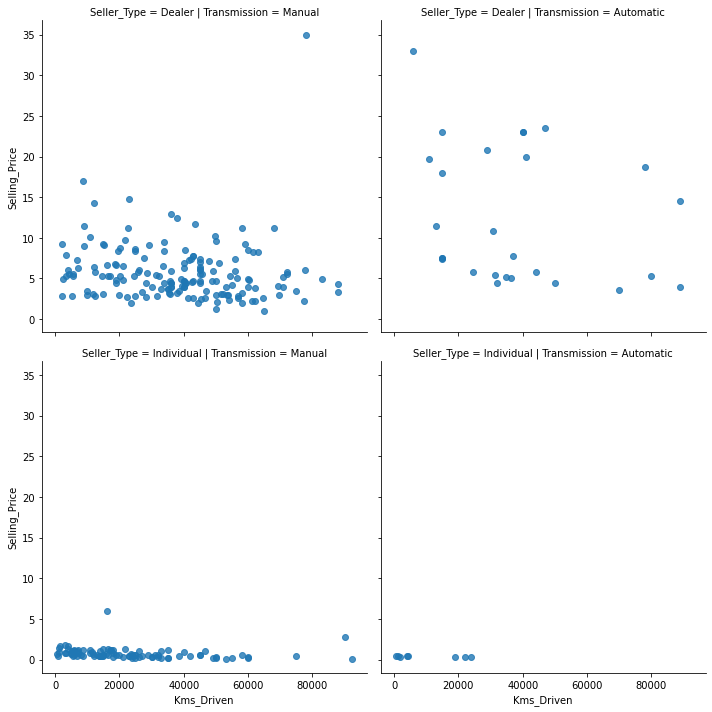

In [35]:
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=cars,fit_reg=False,col='Transmission',row='Seller_Type')
plt.show()

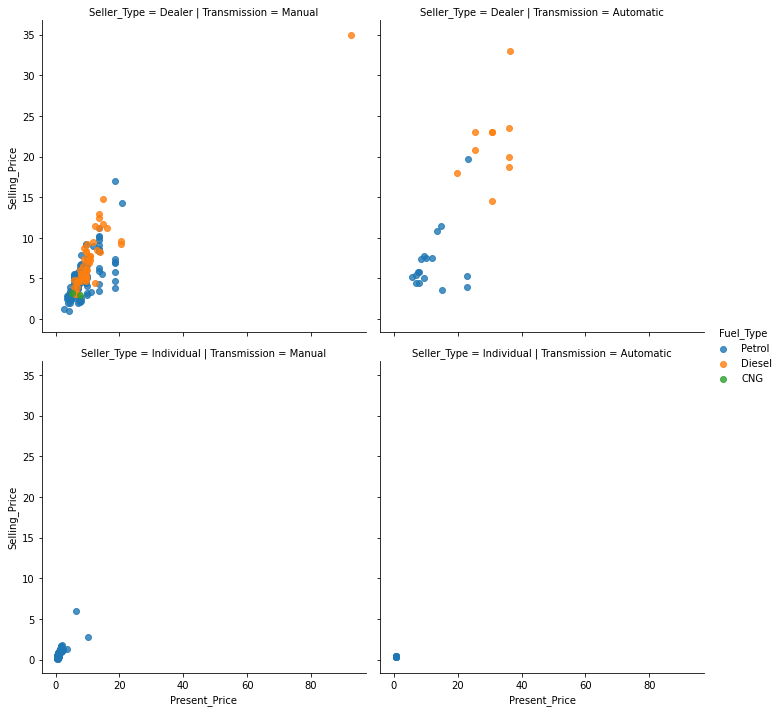

In [36]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=cars,fit_reg=False,col='Transmission',row='Seller_Type',hue='Fuel_Type')
plt.show()

1. All the individuals seller_type are having only petrol cars.
2. Dealers selling manual transmission cars are selling all the 3 types of fuel cars, most expensive being the diesel cars.

**Converting categorical variables to dummy variables**

In [37]:
#Fuel_Type
cars.Fuel_Type.value_counts()

Petrol    234
Diesel     57
CNG         2
Name: Fuel_Type, dtype: int64

In [38]:
cars.Seller_Type.value_counts()

Dealer        192
Individual    101
Name: Seller_Type, dtype: int64

In [39]:
cars.Transmission.value_counts()

Manual       258
Automatic     35
Name: Transmission, dtype: int64

In [40]:
cars = pd.get_dummies(cars,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    293 non-null    int64  
 1   Selling_Price           293 non-null    float64
 2   Present_Price           293 non-null    float64
 3   Kms_Driven              293 non-null    int64  
 4   Owner                   293 non-null    int64  
 5   Fuel_Type_Diesel        293 non-null    uint8  
 6   Fuel_Type_Petrol        293 non-null    uint8  
 7   Seller_Type_Individual  293 non-null    uint8  
 8   Transmission_Manual     293 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 23.0 KB


In [42]:
cars.shape

(293, 9)

In [43]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


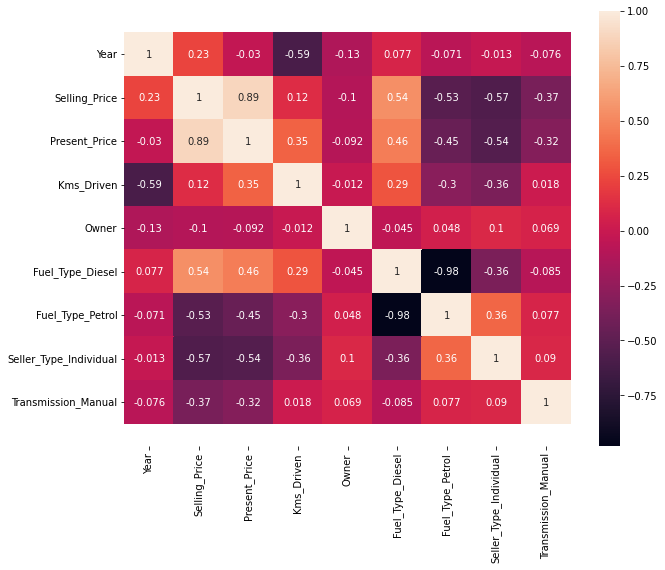

In [44]:
#Heatmap to show the correlation between various variables of the dataset

plt.figure(figsize=(10,8))
cor = cars.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The target variable Selling Price is highly correlated with:

1. Present Price
2. Fuel Type
3. Seller Type

# **Linear Regression Model**

The simplest from of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable.

The linear regression equation can be expressed in the following form:

y = a1x1 + a2x2 + a3x3 + ...... + anxn + b



*   y is the target variable.
*   x1,x2,x3....xn are the features.
*   a1,a2,a3....an are the coefficients.
*   b is the parameter of the model.



In [45]:
y = cars['Selling_Price']
X = cars.drop(['Selling_Price'],axis=1)

In [46]:
#Spliting the data into train and test 

from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(205, 8)
(88, 8)
(88,)


In [47]:
#standardization of the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)

X_test=sc.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns) 

In [48]:
#Building model using sklearn(Gradient Descent)
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)  # training the algorithm 

# Getting the coefficient and intercept 

print('coefficient: \n', lin_reg.coef_)
print('\n intercept:', lin_reg.intercept_)
#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
#print(coeff_df)

#Now predicting on the test data

y_pred = lin_reg.predict(X_test)

coefficient: 
 [ 0.79921826  3.98239214 -0.84029775  0.1167908   0.94778882  0.07567184
 -0.82638412 -0.75632031]

 intercept: 4.90141463414633


In [49]:
# compare the actual output values for X_test with the predicted values 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True)
df

,index,Actual,Predicted
0,138,0.60,0.943759
1,276,8.65,10.018852
2,177,0.35,2.474121
3,65,4.75,7.019839
4,116,1.10,-0.200621
...,...,...,...
83,165,0.45,3.362738
84,45,7.50,11.201648
85,285,7.40,9.511781
86,144,0.60,0.080892


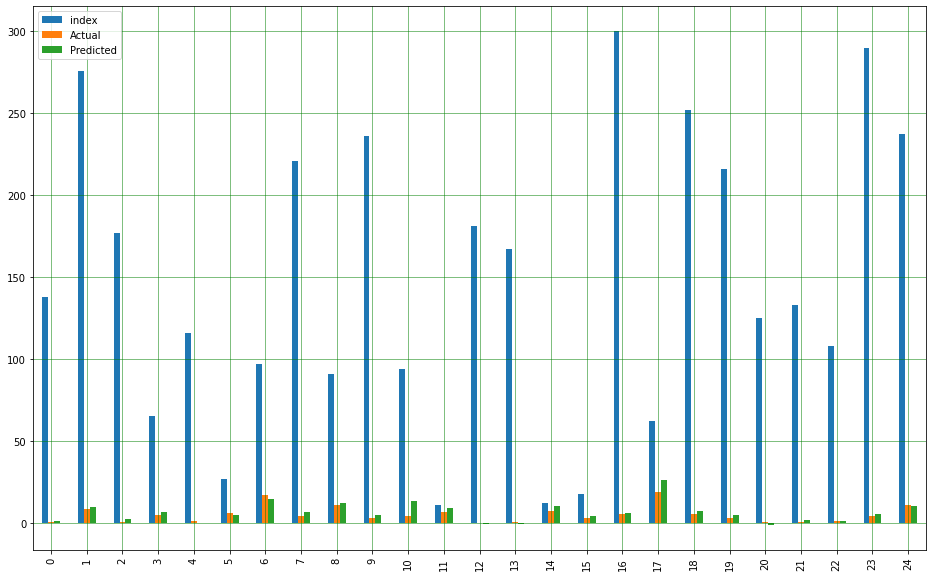

In [50]:
# Showing the difference between the actual and predicted value 

df1 = df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major' , linestyle='-' , linewidth='0.5', color='green')
plt.grid(which='minor' , linestyle=':' , linewidth='0.5', color='black')

In [51]:
#Calculating the accuracy 

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

#or
#print('rsquare_Train', lin_reg.score(X_train, y_train))
#print('rsquare_Test', lin_reg.score(X_test, y_test))

Mean Absolute Error: 1.5982452710819048
Mean Squared Error: 4.656239470735607
Root Mean Squared Error: 2.1578321229269917
r2_score: 0.7284872465087368


In [52]:
# Building a liner Regression model using statsmodel (OLS)

In [53]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

y = cars['Selling_Price']
x = cars.drop(['Selling_Price'],axis=1)
X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
predictions = model.predict(X_constant)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     301.8
Date:                Mon, 13 Feb 2023   Prob (F-statistic):          5.17e-134
Time:                        17:13:12   Log-Likelihood:                -559.84
No. Observations:                 293   AIC:                             1138.
Df Residuals:                     284   BIC:                             1171.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -542

# **Assumptions**

For Linear Regression we need to check if the 5 major assumption hold.

1. No Auto correlation
2. Linearity of variables 
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity

# **Assumption 1 - No autocorrelation**

In [54]:
# 1.  Durbin Watson Test 

#H0 : Linear Regression Rresiduals are not correlated
#H1 : Errors are correlated 

from statsmodels.stats.api import durbin_watson
durbin_watson(model.resid)

1.906624180685661

From summary also we can see the durbin watson value, this is  v close to 2 which indicates no autocorrelation.

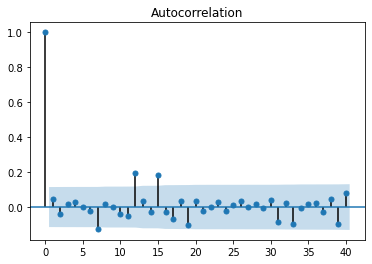

In [55]:
# 2. time series analysis graph 
import statsmodels.tsa.api as smt #tsa time series analysis

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05) #model.resid comes from statsmodel
acf.show()

# from this graph we dont see any pattern in the residuals so this shows no autocorrelation

# **Assumption 2 - Normality of Residuals**

In [56]:
# Jarque berua test
from scipy import stats 
print(stats.jarque_bera(model.resid)) 

#h0 : the data is normally distributed
#h1 : the errors are not normally distributed

Jarque_beraResult(statistic=609.8115535571498, pvalue=0.0)


pvalue(0) < alpha (0.05) so we reject the null hypothesis the errors are not normally distributed.

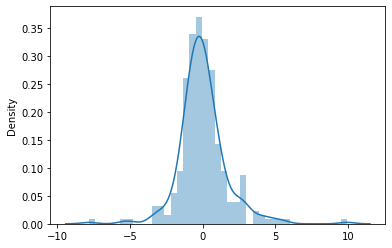

In [57]:
# 2. Histogram 

import seaborn as sns
sns.distplot(model.resid)

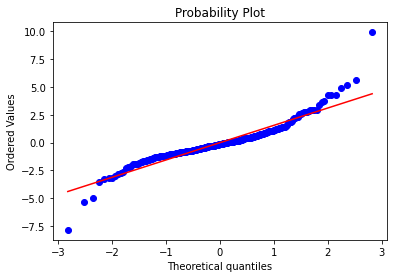

In [58]:
# 3. QQ plot 

import pylab 

stats.probplot(model.resid, dist = 'norm', plot = pylab)
plt.show()

In [59]:
# shapiro wilk test

# H0 : The Data / errors are Normal in Nature 
# H1 : The Data is not Normal 

from scipy.stats import shapiro

teststats, pvalue = shapiro(model.resid)
print(pvalue)
print("reject the null h0")


4.787068636456782e-13
reject the null h0


# **Assumption 3 - Linearity of residuals**

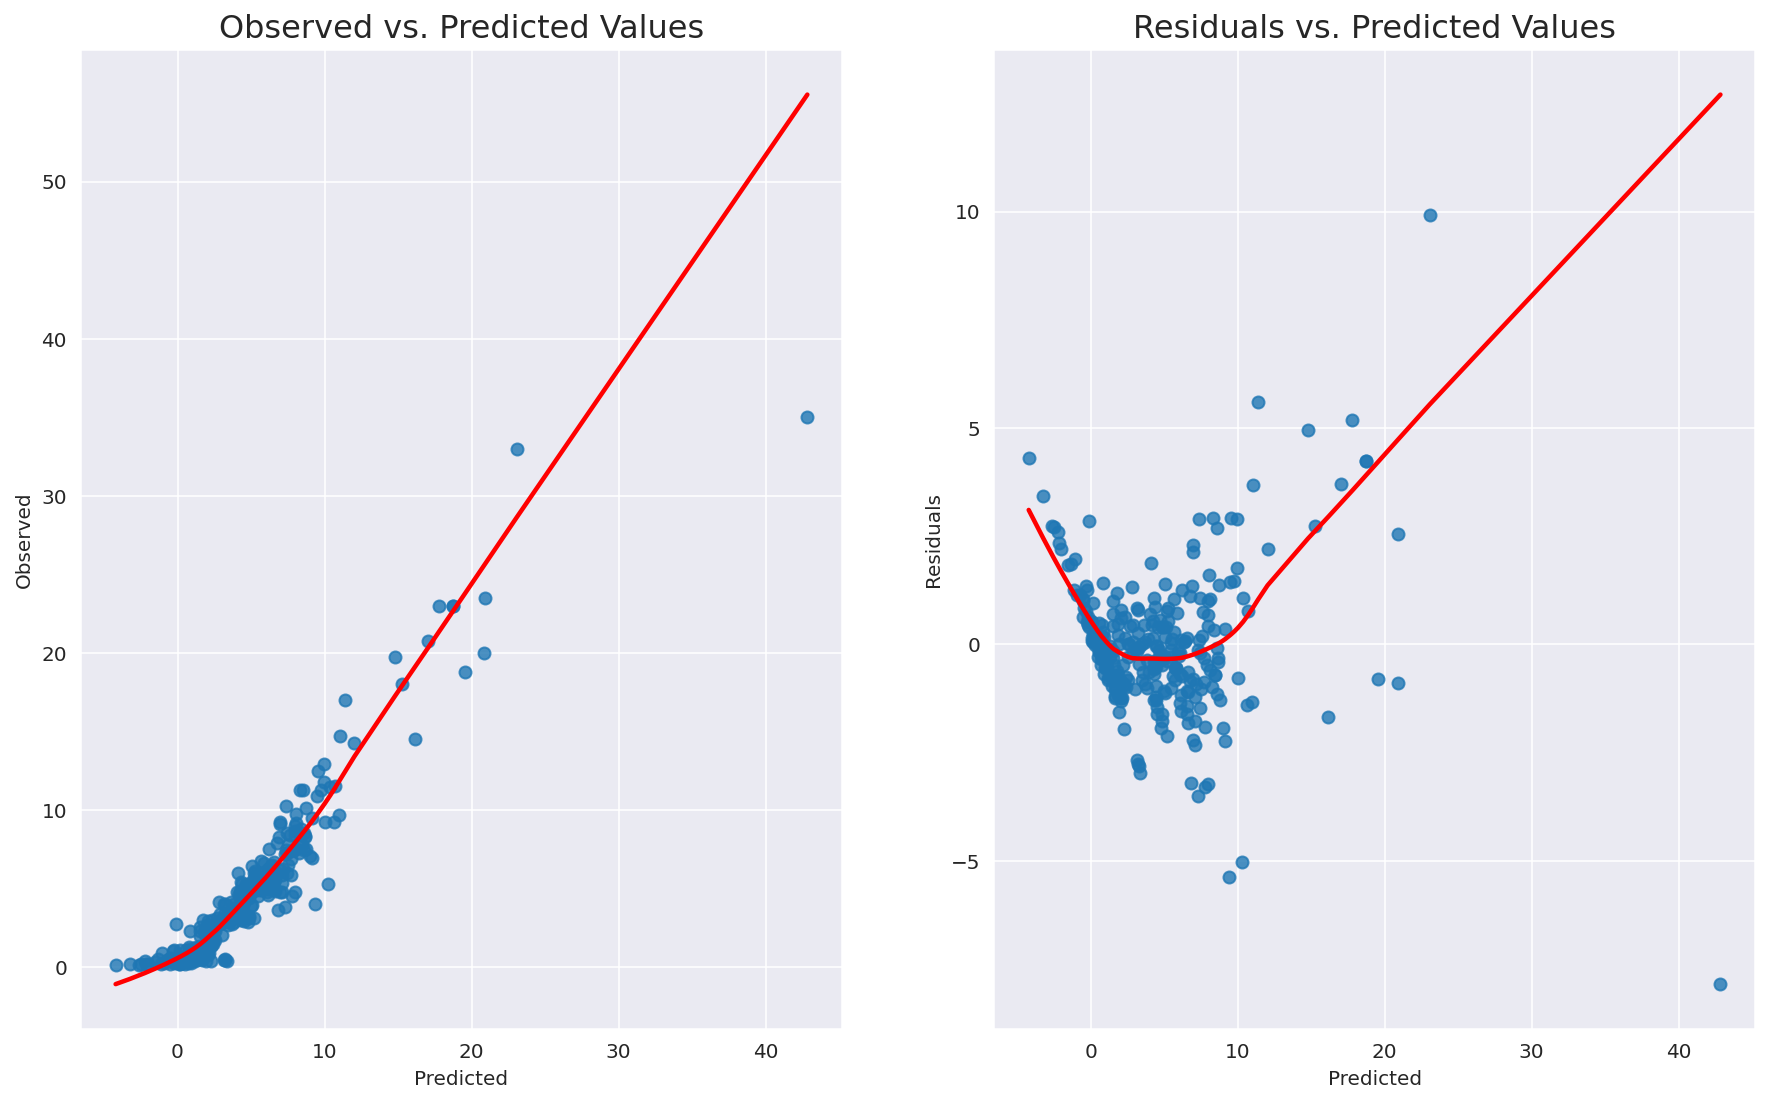

In [60]:
#1. Visual representation

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    #LOWESS (Locally Weighted Scatterplot Smoothing) is a popular tool used in regression analysis that creates a smooth line 
    #through a timeplot or scatter plot to help you to see relationship between variables and foresee trends.

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, y)

In [61]:
# 2. Rainbow test 

import statsmodels.api as sm 
sm.stats.linear_rainbow(res=model, frac=0.5)
# frac : we are not checking the whole data we are just checking the fraction of it

(1.202076227794932, 0.13731368022963622)

# **Assumption 4 - Homoscedasticity_test**

In [62]:
from statsmodels.stats.api import het_goldfeldquandt
from statsmodels.compat import lzip 

In [63]:
# 1. Goldfield Quandt Test:

# H0 : The residuals are not heteroscedastic / same variance / homoscedastic
# H1 : The residuals are heteroscedastic / unequal variance 

name = ['F statistics', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog) 
lzip(name, test)

#exog - x variables and endog - y variables

[('F statistics', 0.259641676026498), ('p-value', 0.9999999999999876)]

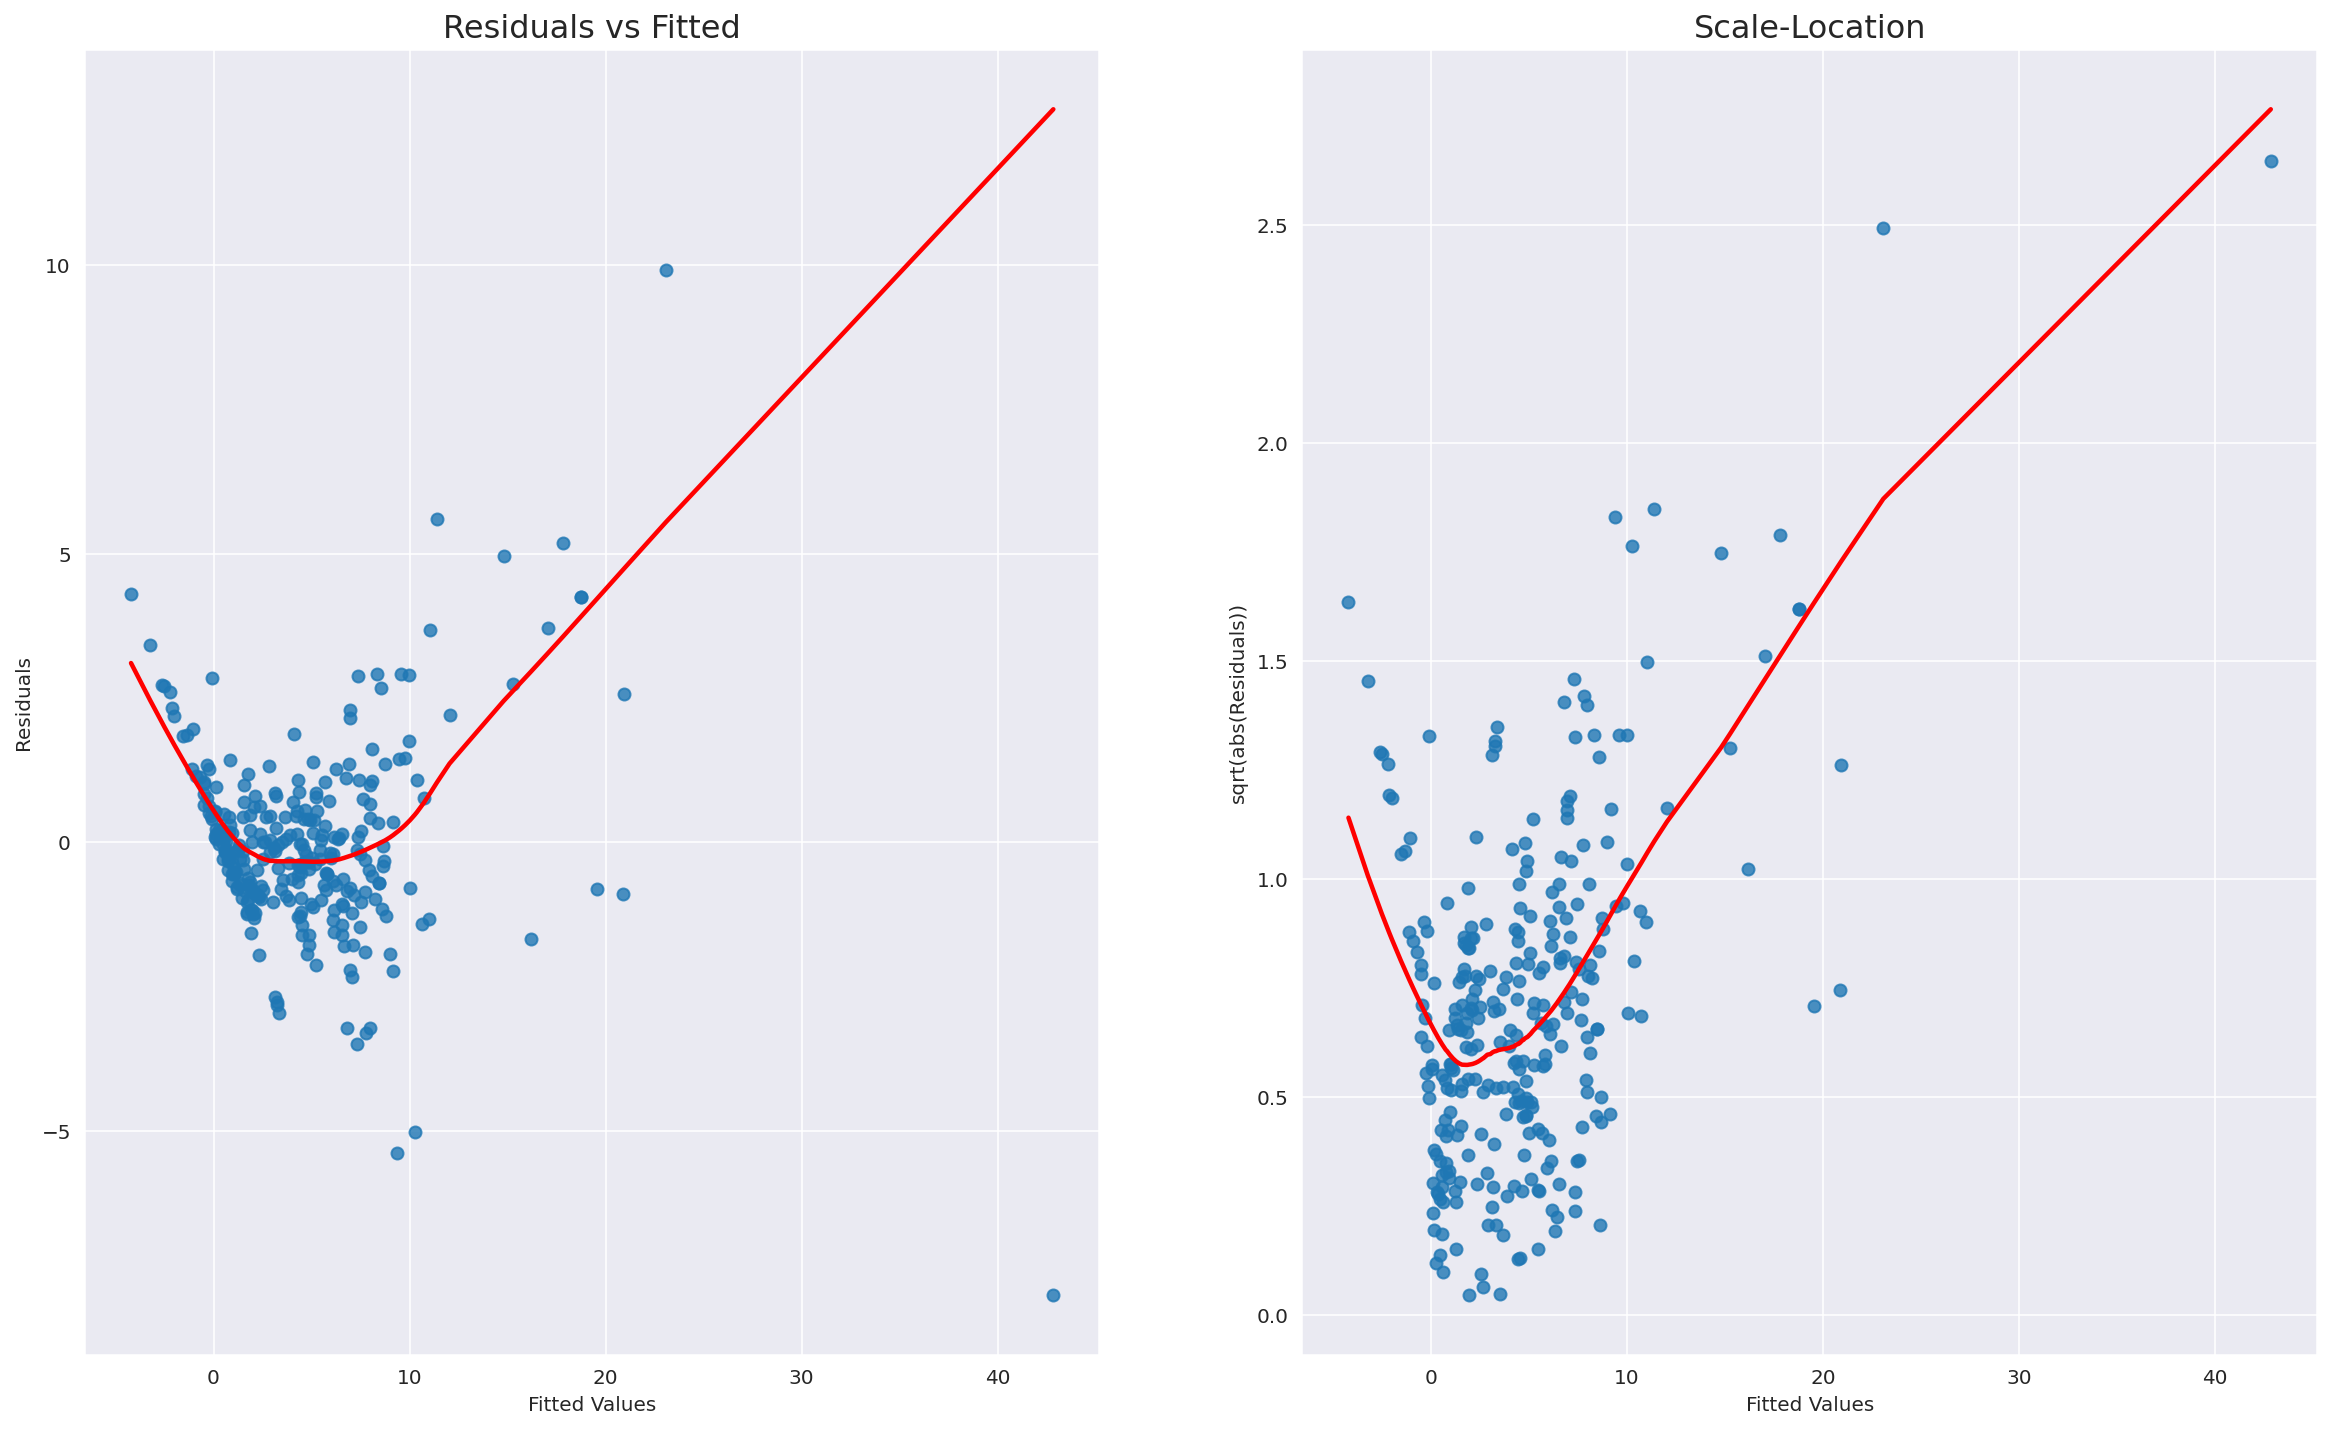

In [64]:
# 2. Visual representation 

fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2,figsize=(20,12))

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color':'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color':'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

plt.show()

# **Assumption 5 - NO MULTI COLLINEARITY**

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
df = pd.DataFrame({'vif': vif[1:]}, index=X.columns)
df

,vif
Year,1.855344
Present_Price,1.837928
Kms_Driven,2.202238
Owner,1.036110
Fuel_Type_Diesel,24.128242
Fuel_Type_Petrol,23.982198
Seller_Type_Individual,1.583834
Transmission_Manual,1.146456


In [66]:
df[df.vif > 5].index

Index(['Fuel_Type_Diesel', 'Fuel_Type_Petrol'], dtype='object')

In [67]:
# After removing multicollinear feature 'Fuel_Type_Diesel'....cars1
cars1 = cars
cars1.drop(['Fuel_Type_Diesel'],axis=1,inplace=True)

X_vif = cars1.drop(['Selling_Price'],axis=1)
y_vif = cars1['Selling_Price']
from sklearn.linear_model import LinearRegression 

lin_reg_vif = LinearRegression()
lin_reg_vif.fit(X,y)

print(f'Coefficients: {lin_reg_vif.coef_}')
print(f'Intercept: {lin_reg_vif.intercept_}')
print(f'R^2 score: {lin_reg_vif.score(X,y)}')

Coefficients: [ 2.71256264e-01  4.55618331e-01 -3.59343507e-05  3.90606193e-01
  2.55936877e+00  4.16137467e-01 -1.46936499e+00 -1.42713508e+00]
Intercept: -542.8983588010778
R^2 score: 0.8947414796898793


In [68]:
# After removing multicollinear feature 'Fuel_Type_Diesel'

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X = cars1.drop(['Selling_Price'],axis=1)
y = cars1['Selling_Price']

X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     340.0
Date:                Mon, 13 Feb 2023   Prob (F-statistic):          2.53e-134
Time:                        17:13:16   Log-Likelihood:                -562.15
No. Observations:                 293   AIC:                             1140.
Df Residuals:                     285   BIC:                             1170.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -552.6791     99.751     -5.541      0.000    -749.022    -356.336
Year                       0.2773      0.049      5.611      0.000       0.180       0.375
Present_Price              0.4588      0.016     29.428      0.000       0.428       0.490
Kms_Driven             -3.543e-05   6.77e-06     -5.236      0.000   -4.87e-05   -2.21e-05
Owner                      0.4151      0.547      0.759      0.449      -0.662       1.492
Fuel_Type_Petrol          -2.0282      0.288     -7.053      0.000      -2.594      -1.462
Seller_Type_Individual    -1.4389      0.258     -5.575      0.000      -1.947      -0.931
Transmission_Manual       -1.4331      0.322     -4.447      0.000      -2.068      -0.799
==============================================================================
Omnibus:                       72.442   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              595.611
Skew:                           0.728   Prob(JB):                    4.62e-130
Kurtosis:                       9.831   Cond. No.                     3.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1]}, index=X.columns).T

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
vif,1.849134,1.849134,1.849134,1.849134,1.849134,1.849134,1.849134


In [70]:
#After checking the assumptions found that Normality criteria not met

# we will apply transformation on the data to make the data meet the assumption

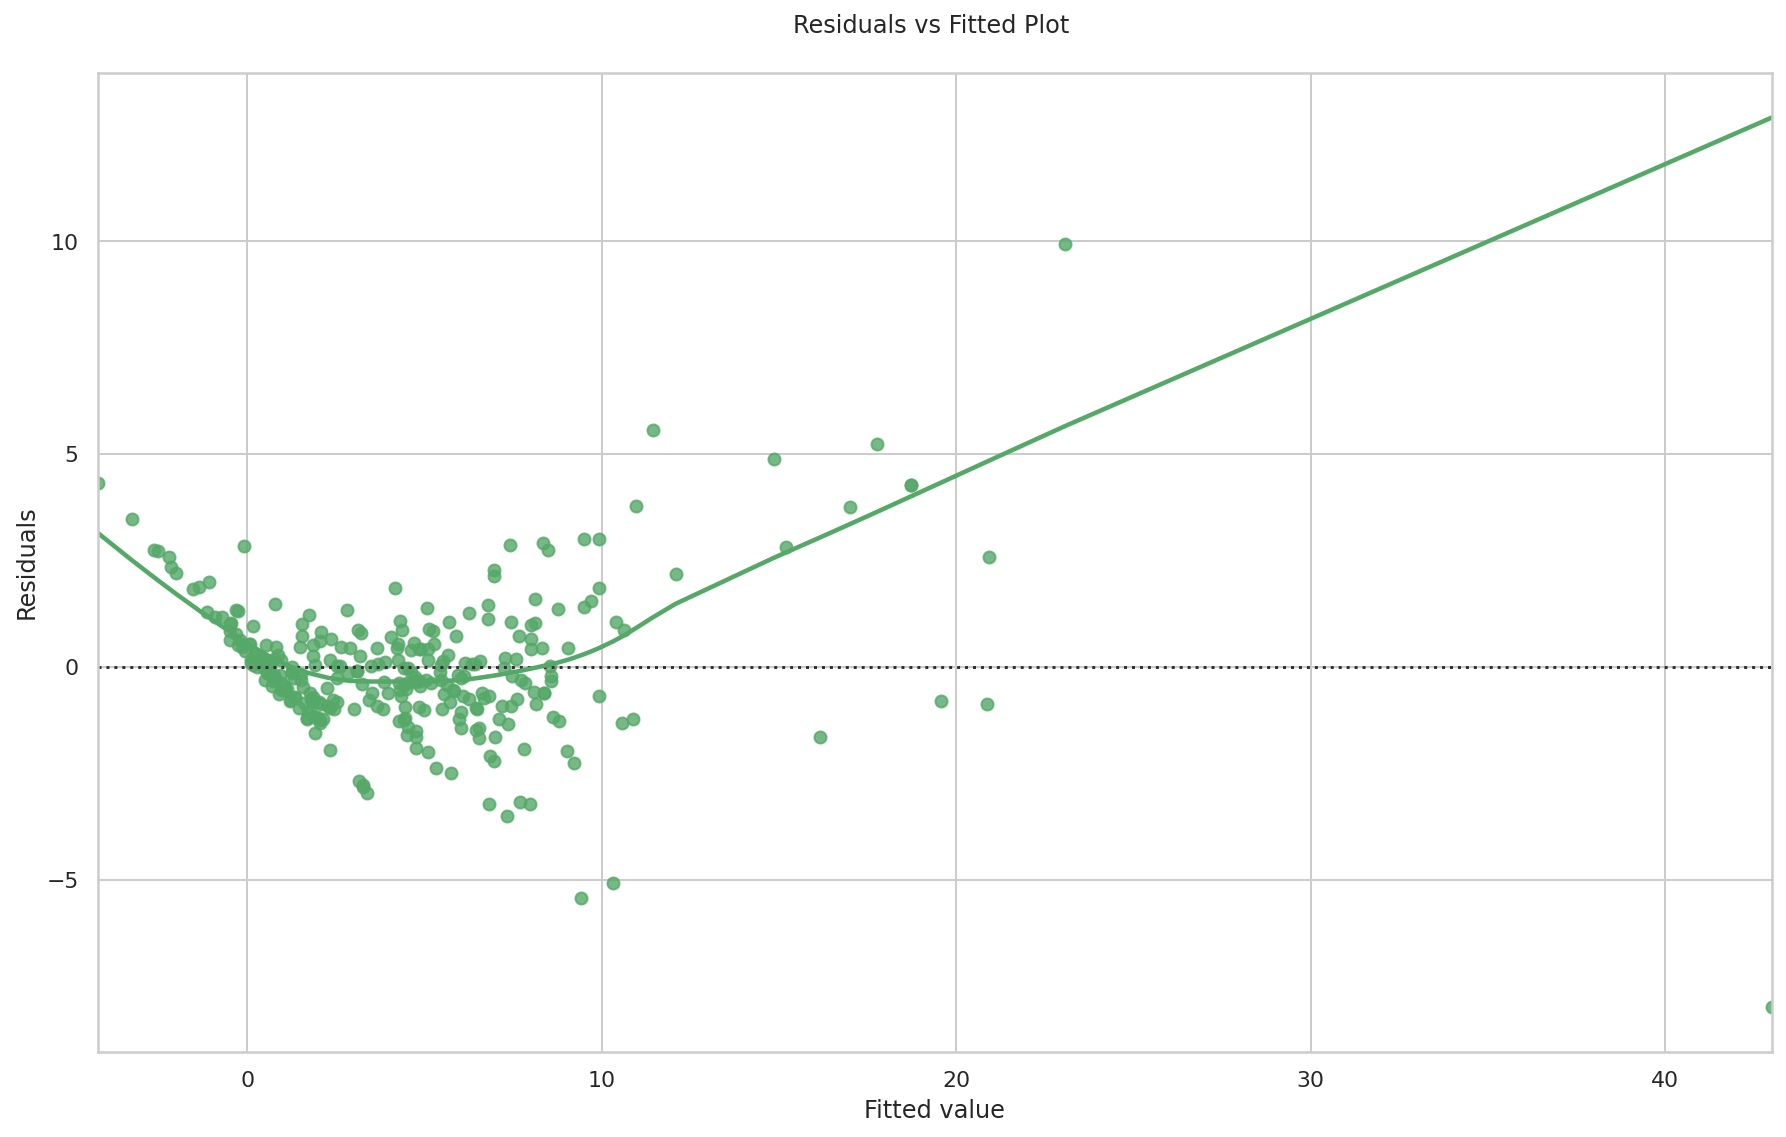

In [71]:
# Residual plot

sns.set(style = 'whitegrid')

cars1['predictions'] = model.predict(X_constant)
residuals = model.resid 

ax = sns.residplot(cars1.predictions, residuals, lowess=True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residuals vs Fitted Plot \n')
plt.show()

In [72]:
# for sqrt(X)

final_df = cars1.transform(lambda x: x**0.5)
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,predictions
0,44.877611,1.830301,2.364318,164.316767,0.0,1.0,0.0,1.0,1.990852
1,44.866469,2.179449,3.088689,207.364414,0.0,0.0,0.0,1.0,2.638180
2,44.911023,2.692582,3.138471,83.066239,0.0,1.0,0.0,1.0,2.731701
3,44.844175,1.688194,2.037155,72.111026,0.0,1.0,0.0,1.0,1.800873
4,44.877611,2.144761,2.621068,206.033978,0.0,0.0,0.0,1.0,2.455944


In [73]:
X_final = final_df.drop(['Selling_Price','predictions'],axis=1)
y_final = final_df.Selling_Price
X_constant_final = sm.add_constant(X_final)
model_final = sm.OLS(y_final, X_constant_final).fit()
predictions_final = model_final.predict(X_constant_final)
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     804.0
Date:                Mon, 13 Feb 2023   Prob (F-statistic):          1.42e-183
Time:                        17:13:17   Log-Likelihood:                 16.484
No. Observations:                 293   AIC:                            -16.97
Df Residuals:                     285   BIC:                             12.47
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -304.1845     26.943    -11.290      0.000    -357.218    -251.151
Year                       6.8001      0.599     11.344      0.000       5.620       7.980
Present_Price              0.6558      0.019     34.781      0.000       0.619       0.693
Kms_Driven                -0.0016      0.000     -5.052      0.000      -0.002      -0.001
Owner                      0.0367      0.076      0.485      0.628      -0.113       0.186
Fuel_Type_Petrol          -0.2689      0.040     -6.699      0.000      -0.348      -0.190
Seller_Type_Individual    -0.2641      0.047     -5.613      0.000      -0.357      -0.171
Transmission_Manual       -0.1000      0.045     -2.221      0.027      -0.189      -0.011
==============================================================================
Omnibus:                       14.674   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.062
Skew:                          -0.215   Prob(JB):                     2.97e-07
Kurtosis:                       4.509   Cond. No.                     3.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#After transformating the data the accuracy/R2 score for the model improved.

#We can look further into the different regularization techniques with different values of alpha and build models

#The best R2 score that this model is giving is using these parameters

# **Regularized Regression**

**1. Ridge Regression**

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.


Loss function = OLS + alpha * summation (squared coefficient values)


In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.


Instead of arbitrarily choosing alpha value ,it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV()

In [75]:
from sklearn.linear_model import RidgeCV,Ridge 

alphas = 10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas=alphas,normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.08148754173103201

The value of alpha that results in the smallest cross-validation error is 0.0814

In [76]:
rr = Ridge(alpha = ridgecv.alpha_, normalize=True)
rr.fit(X_train, y_train)

Ridge(alpha=0.08148754173103201, normalize=True)

In [77]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rr.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test, rr.predict(X_test)))

Root Mean Squared Error: 2.04354646231782
r2_score: 0.7564859864371551


2. **Lasso Regression**

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

The loss function for Lasso Regression can be expressed as below:

Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we'll use the Lasso() function; however, this time we'll need to include the argument max_iter = 10000. Other than that change, we proceed just as we did in fitting a ridge model:

In [78]:
from sklearn.linear_model import LassoCV,Lasso 

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated score:

In [79]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.00033290967622077165, max_iter=10000, normalize=True)

The value of alpha that results in the smallest cross-validation error is 0.000332.

In [80]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test, lasso.predict(X_test)))

Root Mean Squared Error: 2.151902612277087
r2_score: 0.7299773770623945


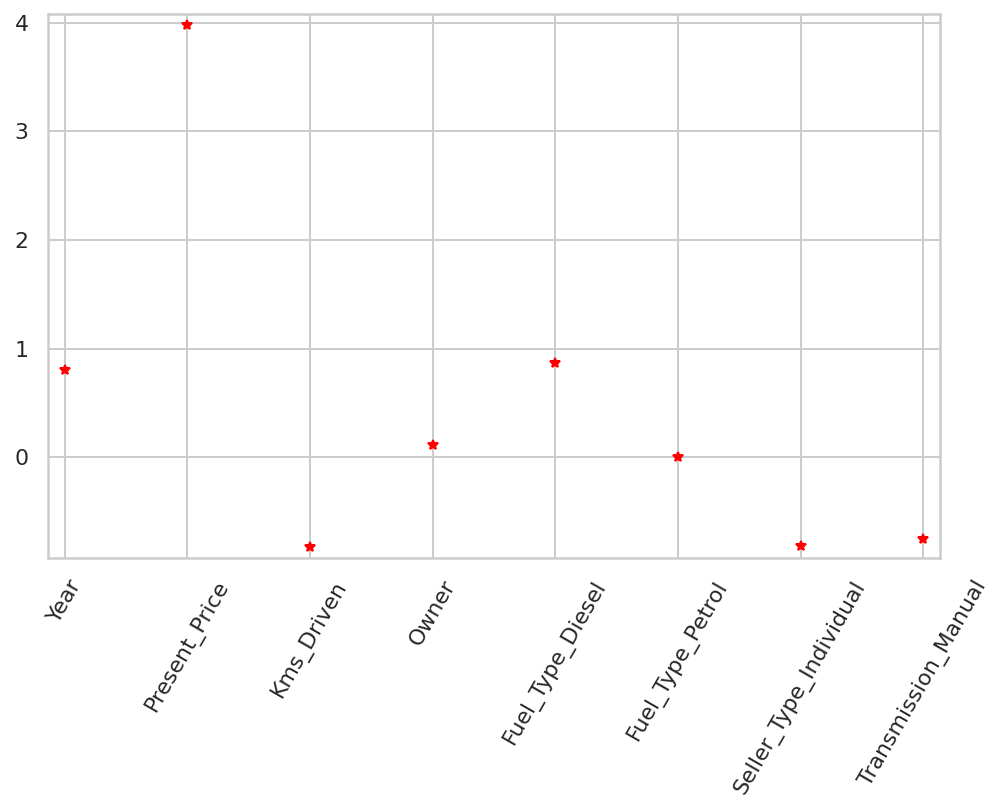

In [81]:
# Plot the coefficients
plt.figure(figsize=(8,5))

colnames = X_train.columns 

plt.plot(range(len(colnames)), lasso.coef_, linestyle='none',marker='*',markersize=5,color='red')
plt.xticks(range(len(colnames)), colnames.values,rotation=60)
plt.margins(0.02)
plt.show()

We can say that the Ridge model is performing better than the Lasso model.

**3. ElasticNet Regression**

ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In [83]:
# lets perform a cross-validation to find the best combination of alpha and L1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet

# How much importance should be given to L1 regularization 
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True,
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5,
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [84]:
cv_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=2000, n_jobs=-1, normalize=True)

In [85]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
#The amount of penalization chosen by cross validation

print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
#The compromise between l1 and l2 penalization chosen by cross validation

print('Number of iteration %d'%cv_model.n_iter_)
#number of iterations run by the coordinate descent solver to reach the specified tolerance for the optimal alpha.

Optimal alpha: 0.00108512
Optimal l1_ratio: 0.500
Number of iteration 25


In [89]:
# train model with best parameters from CV
elastic = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.0010851196453481816, max_iter=25, normalize=True)

In [90]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, elastic.predict(X_test))))

print('r2_score:', metrics.r2_score(y_test, elastic.predict(X_test)))

Root Mean Squared Error: 2.005172333877088
r2_score: 0.7655456290276874


Out of the 3 regularization models the Elastic Net Model is performing the best on this dataset.